In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import missingno as msno
from collections import Counter

## Raw data:

In [7]:
data = pd.read_csv("./dataset/maps-synthetic-data-v1.1.csv", engine='python')
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13734 entries, 0 to 13733
Data columns (total 85 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         13734 non-null  int64  
 1   X                  13734 non-null  int64  
 2   flag               13734 non-null  object 
 3   comp_bed_9         8174 non-null   object 
 4   mat_dep            11145 non-null  float64
 5   mat_age            13326 non-null  object 
 6   weight_16          5351 non-null   float64
 7   height_16          5364 non-null   float64
 8   iq                 7288 non-null   float64
 9   comp_noint_bed_16  471 non-null    object 
 10  comp_int_bed_16    2570 non-null   object 
 11  talk_phon_wend     4850 non-null   object 
 12  text_wend          4841 non-null   object 
 13  talk_mob_wend      4834 non-null   object 
 14  comp_wend          4839 non-null   object 
 15  musi_wend          4831 non-null   object 
 16  read_wend          483

In [4]:
dictionary = pd.read_csv("./dataset/synthetic_data_dictionary.csv", engine='python')
dictionary.head()

,Variable Name,Variable ALSPAC Name,Variable Description,Variable Type,Administered to,Age of child at administration,ALSPAC Measure,ALSPAC Responses,Processing Details,Reference Document
0,agg_score,f596,Aggression score of partnership,Discrete,Mother,Aged 8 months,Derived by ALSPAC. See Processing Details,NaN,Aggression score was determined by three quest...,NaN
1,alon_week,ccs1006,Average time child spent per day doing things ...,Ordinal,Child,Aged 198 months,"""How much time on average do you spend each da...",Not at all,"The category ""Not at all"" was collapsed into t...",NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Less than 1 hour,NaN,NaN
3,,,NaN,NaN,NaN,NaN,NaN,1-2 hours,NaN,NaN
4,,,NaN,NaN,NaN,NaN,NaN,3 or more hours,NaN,NaN


Variables have different Age Of Child At Administration parameters. We don't need the variables with this parameter not equal to 16 (for variables related to screen time) and 18 (for variables related to a depression or anxiety diagnosis).

## only the columns at 16 and 18:

All vars at 16 are separated into weekend and weekdays. Might be worth summing it up into total per week.

In [5]:
rows = dictionary[(dictionary["Age of child at administration"] == "Aged 198 months")]
rows2 = dictionary[(dictionary["Age of child at administration"] == "Aged 198 months")]
rows3 = dictionary[(dictionary["Age of child at administration"] == "Aged around 17.5 years")]
columns_to_keep_names = []
columns_to_keep_names.append(rows["Variable Name"])
columns_to_keep_names.append(rows2["Variable Name"])
columns_to_keep_names.append(rows3["Variable Name"])
print(columns_to_keep_names)

[1              alon_week
5              alon_wend
14            child_bull
20            comp_house
24       comp_int_bed_16
28     comp_noint_bed_16
32             comp_week
36             comp_wend
50             draw_week
54             draw_wend
59              exercise
89             musi_week
93             musi_wend
100         out_sum_week
105         out_sum_wend
109         out_win_week
113         out_win_wend
139            play_week
143            play_wend
148            read_week
152            read_wend
158        talk_mob_week
162        talk_mob_wend
166       talk_phon_week
170       talk_phon_wend
178            text_wend
182            tran_week
186            tran_wend
196              tv_week
200              tv_wend
205            work_week
209            work_wend
Name: Variable Name, dtype: object, 1              alon_week
5              alon_wend
14            child_bull
20            comp_house
24       comp_int_bed_16
28     comp_noint_bed_16
32           

## Remove vars at wrong ages: TO FIX!!

In [19]:
df = pd.DataFrame(data)
columns = list(df)

for i in columns:
    if (df[i][0] in columns_to_keep_names):
        print("keep")
    else: df.drop(df[i])

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

## Mohammed's stuff:

In [5]:
for i in data.columns:
    if len(data[i].unique()) <= 7:
        print(i, data[i].unique())

flag ['synthetic']
comp_bed_9 [nan 'No' 'Yes']
comp_noint_bed_16 [nan 'Yes']
comp_int_bed_16 [nan 'Yes']
talk_phon_wend ['Any at all' nan 'Not at all']
text_wend ['Less than 1 hour' nan 'Not at all' '3 or more hours' '1-2 hours']
talk_mob_wend ['Less than 1 hour' nan 'Not at all' '1 or more hours']
comp_wend ['1-2 hours' nan 'Less than 1 hour' '3 or more hours' 'Not at all']
musi_wend ['Not at all' nan 'Any at all']
read_wend ['Less than 1 hour' nan '1 or more hours' 'Not at all']
work_wend ['3 or more hours' nan '1-2 hours' 'Less than 1 hour']
alon_wend ['1-2 hours' nan '3 or more hours' 'Less than 1 hour']
draw_wend ['Not at all' nan 'Less than 1 hour' '1 or more hours']
play_wend ['3 or more hours' nan 'Less than 3 hours']
tv_wend ['1-2 hours' nan '3 or more hours' 'Less than 1 hour' 'Not at all']
out_win_wend ['3 or more hours' nan 'Less than 1 hour' '1-2 hours']
out_sum_wend ['3 or more hours' nan 'Less than 3 hours']
tran_wend ['Less than 1 hour' nan '1 or more hours']
talk_phon_

In [6]:
data.drop('flag', inplace = True, axis = 1)
data.drop('Unnamed: 0', inplace = True, axis = 1)
data.drop('X', inplace = True, axis = 1)

In [7]:
for i in ['comp_bed_9', 'pat_pres_10', 'pat_pres_8', 'pat_pres', 'mat_anx_1', 'mat_anx_18m', 'mat_anx_8m', 'emot_cruel',
          'phys_cruel', 'mat_anx_0m', 'child_bull', 'musi_13', 'tv_bed_9', 'own_mob', 'comp_games']:
    data[i] = data[i].replace(['Yes'], True)
    data[i] = data[i].replace(['No'], False)
    
for i in ['comp_noint_bed_16', 'comp_int_bed_16', 'comp_house', 'tv_bed_16']:
    data[i] = data[i].replace(['Yes'], True)
    data[i] = data[i].fillna(False)
    
for i in ['talk_phon_wend', 'musi_wend', 'talk_phon_week', 'musi_week']:
    data[i] = data[i].replace(['Not at all'], False)
    data[i] = data[i].replace(['Any at all'], True)

for i in ['play_wend', 'out_sum_wend', 'play_week', 'out_sum_week']:
    data[i] = data[i].replace(['Less than 3 hours'], False)
    data[i] = data[i].replace(['3 or more hours'], True)
    
for i in ['tran_wend', 'tran_week']:
    data[i] = data[i].replace(['Less than 1 hour'], False)
    data[i] = data[i].replace(['1 or more hours'], True)
    
data['has_dep_diag'] = data['has_dep_diag'].replace([' No ICD-10 diagnosis of depression'], False)
data['has_dep_diag'] = data['has_dep_diag'].replace(['Yes ICD-10 diagnosis of depression'], True)

data['creat_14'] = data['creat_14'].replace(['often'], True)
data['creat_14'] = data['creat_14'].replace(['sometimes'], False)

    
data.head()

,comp_bed_9,mat_dep,mat_age,weight_16,height_16,iq,comp_noint_bed_16,comp_int_bed_16,talk_phon_wend,text_wend,...,dep_score,comp_house,tv_bed_16,creat_14,comp_games,fam_tv_eve,fam_tv_aft,fam_tv_mor,sex,birth_order
0,NaN,3.0,30,59.294132,181.602831,107.0,False,False,True,Less than 1 hour,...,0.0,True,True,True,False,"Yes, Some Days",Other,"Yes, Every Day",Female,A
1,NaN,9.0,26,NaN,NaN,85.0,False,False,NaN,NaN,...,NaN,False,False,NaN,NaN,NaN,NaN,NaN,Female,B
2,NaN,3.0,24,NaN,NaN,NaN,False,False,NaN,NaN,...,NaN,False,False,NaN,NaN,"Yes, Some Days","Yes, Every Day",Other,Male,A
3,False,NaN,22,49.812426,160.224186,NaN,False,False,NaN,NaN,...,NaN,False,False,NaN,False,NaN,NaN,NaN,Male,A
4,False,8.0,31,62.270030,191.703227,132.0,True,False,False,Not at all,...,NaN,False,False,True,False,"Yes, Some Days","Yes, Every Day","Yes, Every Day",Female,A


In [8]:
for i in ['talk_mob_wend', 'read_wend', 'draw_wend', 'talk_mob_week', 'read_week', 'draw_week']:
    data[i] = data[i].replace(['Not at all', 'Less than 1 hour', '1 or more hours'], range(3))
    
for i in ['work_wend', 'alon_wend', 'out_win_wend', 'work_week', 'alon_week', 'out_win_week']:
    data[i] = data[i].replace(['Less than 1 hour', '1-2 hours', '3 or more hours'], range(3))
    
for i in ['phone_14_wend', 'phone_14_week']:
    data[i] = data[i].replace(['Not at all', '< 1 hour', '1 or more hours'], range(3))
    
for i in ['fam_tv_eve', 'fam_tv_aft', 'fam_tv_mor']:
    data[i] = data[i].replace(['Other', 'Yes, Some Days', 'Yes, Every Day'], range(3))    

In [9]:
for i in ['text_wend', 'comp_wend', 'tv_wend', 'text_week', 'comp_week', 'tv_week']:
    data[i] = data[i].replace(['Not at all', 'Less than 1 hour', '1-2 hours', '3 or more hours'], range(4))

In [10]:
percentages = ['dep_band_07', 'dep_band_15', 'dep_band_13', 'dep_band_10', 'anx_band_15', 'anx_band_07',
               'anx_band_13', 'anx_band_10']
for i in percentages:
    data[i] = data[i].str.strip('%<>~').astype('float')

In [11]:
data['exercise'] = data['exercise'].replace(['Never', 'Less than once a month', '1-3 times a month',
                                             '1-4 times a week', '5 or more times a week'], range(5))

data['num_home'] = data['num_home'].replace(['9 or more'], '9').astype('float')

In [12]:
data['mat_age'] = data['mat_age'].replace(['< 16','>43'], ['15', '44']).astype('float')

data['weight_16'].round(decimals = 2)
data['height_16'].round(decimals = 2)

0        181.60
1           NaN
2           NaN
3        160.22
4        191.70
          ...  
13729       NaN
13730       NaN
13731    169.24
13732       NaN
13733    176.87
Name: height_16, Length: 13734, dtype: float64

In [13]:
for i in ['pat_edu', 'mat_edu']:
    data[i] = data[i].replace(['CSE/None', 'cse'], 0)
    data[i] = data[i].replace(['Vocational', 'O level', 'A level', 'Degree'], range(1, 5))
    
for i in ['pat_ses', 'mat_ses', 'pat_edu', 'mat_edu']:
    print(data[i].unique())

['III (manual)' nan 'III (non-manual)' 'ii' 'i' 'iv' 'v' 'Armed forces']
['ii' nan 'iv' 'i' 'III (non-manual)' 'III (manual)' 'v' 'Armed forces']
[ 3. nan  2.  1.  4.  0.]
[ 3. nan  2.  1.  0.  4.]


In [14]:
data['alon'] = data['alon_week'] + data['alon_wend']
data['draw'] = data['draw_week'] + data['draw_wend']
data['musi'] = data['musi_week'] + data['musi_wend']
data['out_sum'] = data['out_sum_week'] + data['out_sum_wend']
data['out_sum'] = data['out_sum_week'] + data['out_sum_wend']
data['phone_14'] = data['phone_14_week'] + data['phone_14_wend']
data['play'] = data['play_week'] + data['play_wend']
data['read'] = data['read_week'] + data['read_wend']
data['text'] = data['text_week'] + data['text_wend']
data['tran'] = data['tran_week'] + data['tran_wend']
data['work'] = data['work_week'] + data['work_wend']
data['comp'] = data['comp_week'] + data['comp_wend']
data['comp_bed_16'] = (data['comp_int_bed_16'] | data['comp_noint_bed_16'])
data['comp'] = (data['comp_int_bed_16'] | data['comp_noint_bed_16'] | data['comp_house'])
data['tv'] = data['tv_week'] + data['tv_wend']
data['talk_mob'] = data['talk_mob_week'] + data['talk_mob_wend']
data['talk_phon'] = data['talk_phon_week'] + data['talk_phon_wend']
data['fam_tv'] = data['fam_tv_aft'] + data['fam_tv_eve'] + data['fam_tv_mor']

## Mohamed's stuff

In [34]:
transposed_data = data.T
transposed_data

,0,1,2,3,4,5,6,7,8,9,...,13724,13725,13726,13727,13728,13729,13730,13731,13732,13733
comp_bed_9,NaN,NaN,NaN,False,False,False,NaN,NaN,False,NaN,...,False,False,False,NaN,True,NaN,False,NaN,False,False
mat_dep,3,9,3,NaN,8,10,0,NaN,4,0,...,3,1,NaN,0,8,13,6,21,10,6
mat_age,30,26,24,22,31,30,36,26,30,30,...,33,32,18,22,21,27,29,37,30,26
weight_16,59.2941,NaN,NaN,49.8124,62.27,78.9366,NaN,84.2997,70.6573,70.5294,...,NaN,NaN,59.2876,NaN,NaN,NaN,NaN,58.0758,NaN,70.7329
height_16,181.603,NaN,NaN,160.224,191.703,169.722,NaN,186.327,176.028,187.778,...,NaN,NaN,174.365,NaN,NaN,NaN,NaN,169.236,NaN,176.874
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
comp_bed_16,False,False,False,False,True,False,False,False,True,False,...,False,True,False,False,False,False,False,False,False,False
tv,4,NaN,NaN,NaN,5,5,NaN,NaN,4,NaN,...,4,3,NaN,NaN,NaN,NaN,6,6,1,NaN
talk_mob,2,NaN,NaN,NaN,0,2,NaN,NaN,3,NaN,...,2,2,NaN,NaN,NaN,NaN,2,4,0,NaN
talk_phon,1,NaN,NaN,NaN,0,2,NaN,NaN,2,NaN,...,0,2,NaN,NaN,NaN,NaN,0,2,1,NaN


In [35]:
missing_data = pd.DataFrame(data[data.columns[data.isnull().any()]].isnull().sum()/len(data)*100)

In [36]:
names = []
for i in range(len(missing_data)):
        names.append(missing_data.iloc[i].name)
values = []
for i in range(len(missing_data)):
        values.append(missing_data.iloc[i][0])

data_1 = {'Features': names,'% Missing Data': values}

missing_df = pd.DataFrame(data_1)

missing_df.sort_values(by = ['% Missing Data'], ascending = False)

,Features,% Missing Data
69,dep_thoughts,86.857434
64,own_mob,68.064657
65,has_dep_diag,67.139945
67,prim_diag,67.139945
68,panic_score,67.139945
...,...,...
43,phys_cruel,17.715159
42,emot_cruel,17.715159
48,mat_edu,9.895151
49,parity,8.664628


In [38]:
## Dropping columns (features / variables) that have NaN values above a certain threshold

threshold = 50

for i in range (len(missing_df)):
  if(missing_df.iloc[i]['% Missing Data'] > threshold):
    data.drop(columns = missing_df.iloc[i][0], inplace = True)

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13734 entries, 0 to 13733
Data columns (total 39 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   comp_bed_9         8174 non-null   object 
 1   mat_dep            11145 non-null  float64
 2   mat_age            13326 non-null  object 
 3   iq                 7288 non-null   float64
 4   comp_noint_bed_16  13734 non-null  bool   
 5   comp_int_bed_16    13734 non-null  bool   
 6   pat_pres_10        8057 non-null   object 
 7   pat_pres_8         7729 non-null   object 
 8   pat_pres           9579 non-null   object 
 9   num_home           9583 non-null   object 
 10  mat_anx_1          9700 non-null   object 
 11  mat_anx_18m        9884 non-null   object 
 12  mat_anx_8m         10488 non-null  object 
 13  agg_score          10714 non-null  float64
 14  emot_cruel         11301 non-null  object 
 15  phys_cruel         11301 non-null  object 
 16  mat_anx_0m         112

## Iban's stuff:

In [37]:
for i in range(13734):
    if data.at[i,"comp_week"] == "Not at all":
        data.at[i,"comp_week"] = 0
    if data.at[i,"comp_week"] == "Less than 1 hour":
        data.at[i,"comp_week"] = 1
    if data.at[i,"comp_week"] == "1-2 hours":
        data.at[i,"comp_week"] = 2
    if data.at[i,"comp_week"] == "3 or more hours":
        data.at[i,"comp_week"] = 3 

<AxesSubplot:xlabel='comp_week', ylabel='Count'>

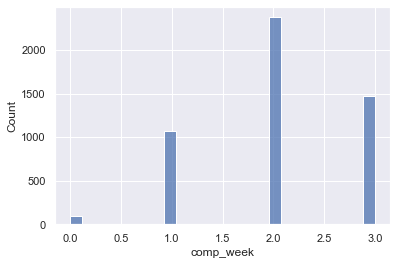

In [38]:
sns.set_theme()
sns.histplot(data.comp_week)

In [39]:
mean = np.mean(data.comp_week)
print("mean:", mean)
mode = stats.mode(data.comp_week)
print("mode:", mode)
median = np.median(data.comp_week)
print("median:", median)

mean: 2.041907802833766
mode: ModeResult(mode=array([2.]), count=array([2375]))
median: nan


In [15]:


data.to_csv("newdata.csv")



In [1]:
newdata = pd.read_csv("newdata.csv", engine='python')
newdata.info()

NameError: name 'pd' is not defined